# Import software libraries and load the dataset #

In [145]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]
- NumPy 1.25.2
- pandas 2.0.3
- Matplotlib 3.7.3
- scikit-learn 1.3.2



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [146]:
from sklearn.datasets import load_iris


iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['species'] = iris.target
#Species: 0:setosa, 1:versicolor, 2:virginica
print(iris.target)
iris_df.head(10)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Examine a general summary of statistics

In [147]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Identify outliers

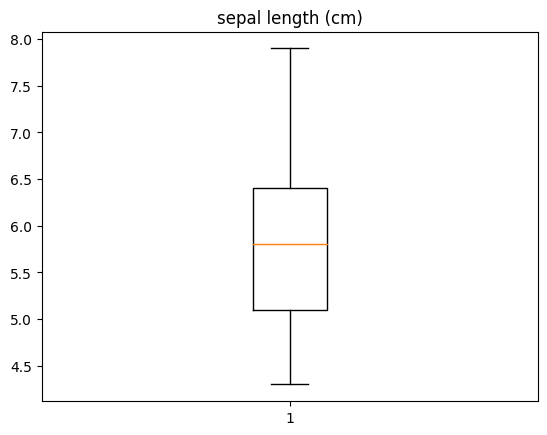

In [148]:
plt.boxplot(iris_df['sepal length (cm)'])
plt.title("sepal length (cm)")
plt.show()


C:\Users\FzoOT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


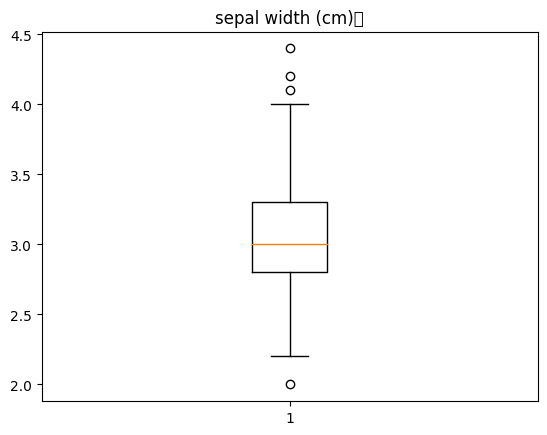

In [149]:
plt.boxplot(iris_df['sepal width (cm)'])
plt.title("sepal width (cm)	")
plt.show()

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [150]:
iris_df = iris_df[iris_df['species'] != 2]

# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

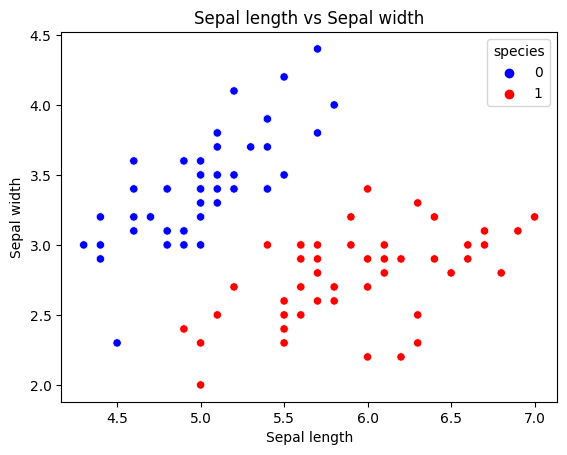

In [151]:
sb.scatterplot(x=iris_df['sepal length (cm)'],y=iris_df['sepal width (cm)'],hue=iris_df['species'],palette=['blue','red'])
plt.title('Sepal length vs Sepal width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Plot a decision boundary for a given model

In [152]:
def get_boundary(model,min_x,max_x):
    w = model.coef_[0]           
    b = model.intercept_[0]      
    x_points = np.linspace(min_x, max_x)    
    y_points = -(w[0] / w[1]) * x_points - b / w[1]
    
    return x_points,y_points

# Train a basic logistic regression model and plot its decision boundary

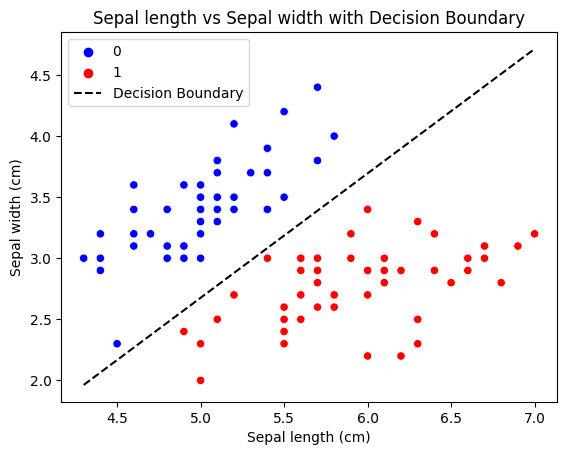

In [153]:
# Selecting features and target
from sklearn.linear_model import LogisticRegression


X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['species']

# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Scatter plot
sb.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'],
               hue=iris_df['species'], palette=['blue', 'red'])

# Plot decision boundary
coeff = model.coef_[0]
intercept = model.intercept_

minx=iris_df['sepal length (cm)'].min()
maxx=iris_df['sepal length (cm)'].max()

x_points,y_points=get_boundary(model,minx,maxx)


plt.plot(x_points, y_points, '--k', label='Decision Boundary')
plt.title('Sepal length vs Sepal width with Decision Boundary')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

In [154]:
minx=iris_df['sepal length (cm)'].min()
maxx=iris_df['sepal length (cm)'].max()

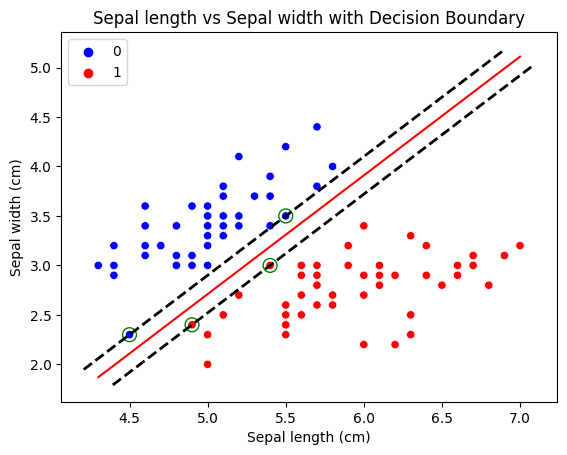

In [155]:
from sklearn import svm

X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['species']

# Initialize and fit the Logistic Regression model
model = svm.SVC(C=100,kernel='linear',random_state=32)

model.fit(X,y)
# Scatter plot
sb.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'],
               hue=iris_df['species'], palette=['blue', 'red'])

# Plot decision boundary
coeff = model.coef_[0]
intercept = model.intercept_

x_points,y_points=get_boundary(model,minx,maxx)
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=100, 
            facecolors='none', 
            edgecolors='g');

# Step 2 (unit-vector):
w_hat = model.coef_[0] / (np.sqrt(np.sum(model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'k--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'k--',
         linewidth=2)

plt.title('Sepal length vs Sepal width with Decision Boundary')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

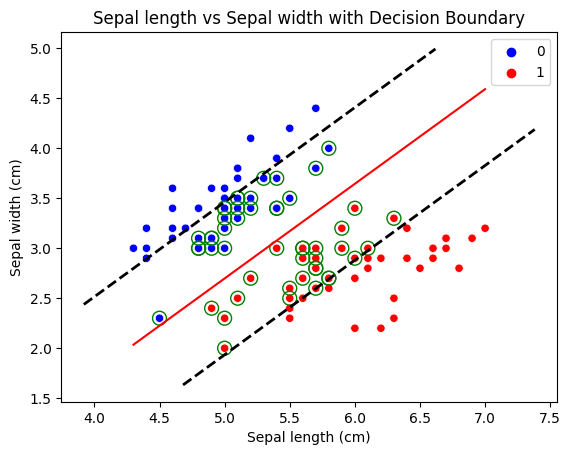

In [156]:
from sklearn import svm

X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['species']

# Initialize and fit the Logistic Regression model
model = svm.SVC(C=0.1,kernel='linear',random_state=32)

model.fit(X,y)
# Scatter plot
sb.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'],
               hue=iris_df['species'], palette=['blue', 'red'])

# Plot decision boundary
coeff = model.coef_[0]
intercept = model.intercept_

x_points,y_points=get_boundary(model,minx,maxx)
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=100, 
            facecolors='none', 
            edgecolors='g');

# Step 2 (unit-vector):
w_hat = model.coef_[0] / (np.sqrt(np.sum(model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'k--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'k--',
         linewidth=2)

plt.title('Sepal length vs Sepal width with Decision Boundary')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# Split the datasets

In [157]:
# Putting feature variable to X
from sklearn.model_selection import train_test_split


X = iris_df.drop('species',axis=1)

# Putting response variable to y
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=42,  
                                   test_size=0.2) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

# Evaluate an SVM model using a holdout test set

In [166]:
from sklearn import svm


# Initialize and fit the Logistic Regression model
model = svm.SVC(C=100,kernel='linear',random_state=32)

model.fit(X_train,y_train)

SVC(C=100, kernel='linear', random_state=32)

In [167]:
from sklearn import svm
from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, mean_squared_error, precision_score, recall_score, f1_score,roc_auc_score

y_pred=model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

